## Extração de Dados e Pesos de Portfólio
Vamos retomar as discussões sobre finanças quantitativas, desde a extração dos dados até o cálculo de retorno, só que, agora, de um portfólio de ativos. 

In [26]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr

Após as importações, é necessária a criação do seu data frame (local de armazenamento de seus dados) e de uma lista com todos os tickers das ações que você deseja adicionar ao seu portfólio. É importante salientar que o ticker escrito deve ser equivalente ao ticker utilizado pelo Yahoo Finance (não necessariamente coincide com o ticker oficial).Vamos fazer uso de algumas empresas aéreas: Azul (AZUL), Latam (LTM- LTMAQ no Yahoo Finance), Gol (GOL) e American Airlines (AAL).

Fazendo uso apenas do preço de fechamento das empresas X, Y, Z. Dessa forma, atribuímos todos os tickers das empresas em questão a uma variável e requisitamos os dados através desta com a limitação do Adjusted Close (Fechamento Ajustado).

In [16]:
tickers = ['AZUL', 'LTMAQ', 'GOL', 'AAL']

df = pd.DataFrame()

for t in tickers:
    df[t] = pdr.DataReader(t, data_source='yahoo', start='01-01-2019', end = '31-12-2020')['Adj Close']

df.tail()

,AZUL,LTMAQ,GOL,AAL
Date,,,,
2020-12-24,21.320000,1.87,9.39,15.660000
2020-12-28,21.570000,1.81,9.28,16.059999
2020-12-29,21.760000,1.80,9.42,15.860000
2020-12-30,22.780001,1.74,9.65,16.150000
2020-12-31,22.820000,1.71,9.82,15.770000


Todos os portfólios devem possuir ativos com determinadas representatividades, chamadas de “pesos”. Você, como investidor, pode optar por possuir a mesma porcentagem de seu patrimônio em cada modalidade de investimento ou pode optar por customizá-la de acordo com suas demandas.
Os processos pelos quais os pesos podem ser definidos são diversos, contudo os meios mais usuais são análises de correlação e relações risco-retorno. Vamos nos concentrar na definição “manual” dos pesos, através da criação de uma matriz de pesos, usualmente chamada de “weights”.

In [17]:
w = [0.3, 0.3, 0.2, 0.2]

### Retorno de um Portfólio
Agora que já sabemos como importar preços históricos e como calcular o risco e retorno de ativos individuais, podemos usar esse conhecimento para começar a montar o nosso portfólio!. A fórmula do retorno de um ativo é muito simples:

$$\begin{equation}
R = \frac{P_t-P_{ti}}{P_{ti}} 
\end{equation}$$

E sua forma acumulada:

$$\begin{equation}
R_{cum} = (1+R_{t_1})\cdot(1+R_{t_2})\cdot...\cdot(1+R_{t_n})
\end{equation}$$

Logo, basta calcular os retornos de cada período para termos o retorno total. Entretanto, para carteiras com mais de um ativo é necessário ponderar o retorno de cada ativo pelo seu respectivo peso.
Para fazer isso, vamos exemplificar com uma carteira de 4 ações diferentes: Azul (AZUL), Latam (LTMAQ), Gol (GOL) e American Airlines (AAL) no período de um ano (17/05/2020 a 17/05/2021). Cada ação possui um peso, ou seja, o quanto ela representa do total da carteira. Evidentemente, a soma desses pesos deve totalizar 1. Por exemplo: w = [0.3, 0.3, 0.2, 0.2], isso significa que temos 30% do nosso capital investido em AZUL, 30% em LTMAQ, 20% em GOL e 20% em AAL.

Existem algumas maneiras de se calcular o retorno de um portfólio em um período t, uma delas é calculá-lo pela seguinte fórmula vetorizada:

$$\begin{equation}
R = \vec r \times \vec w
\end{equation}$$

Onde 𝑟⃗ é o vetor de retornos de cada ativo da carteira no período, e 𝑤⃗ os seus respectivos pesos.
O que essa fórmula nos diz? É muito simples, basicamente estamos multiplicando o retorno de cada ativo em cada período (minuto, dia, mês, etc) pelo seu peso e somando-os.


Mais especificamente, o resultado da multiplicação do retorno de um ativo em uma data pelo seu peso na carteira é denominado de attribution. Logo, o retorno do portfólio em uma data é a soma dos attributions de cada ativo, ou seja, suas contribuições.
Fazer essa conta por multiplicação de matrizes funciona apenas para quando os pesos dos ativos não mudam conforme o tempo passa. Caso os pesos da carteira mudem com o tempo, é necessário fazer a multiplicação “element wise”.
Finalmente, note que R será um vetor de 1 coluna e t linhas, onde t é a quantidade de períodos.

In [19]:
## Extração de preços Ibovespa para comparação com o retorno do portfólio
ibov = pdr.DataReader('^BVSP', data_source = 'yahoo', start = '01-01-2019', end = '31-12-2020')['Adj Close']
ibov.head()

Date
2019-01-02    91012.0
2019-01-03    91564.0
2019-01-04    91841.0
2019-01-07    91699.0
2019-01-08    92032.0
Name: Adj Close, dtype: float64

In [20]:
# Matriz de retornos
r = df.pct_change()
r

,AZUL,LTMAQ,GOL,AAL
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,0.002090,-0.018130,-0.002234,-0.074507
2019-01-04,0.007647,0.060253,0.008209,0.065868
2019-01-07,-0.032770,0.026581,-0.050333,0.028402
2019-01-08,-0.008916,0.009821,0.016368,-0.016085
...,...,...,...,...
2020-12-24,-0.012963,0.027473,-0.002125,-0.014475
2020-12-28,0.011726,-0.032086,-0.011715,0.025543
2020-12-29,0.008809,-0.005525,0.015086,-0.012453


In [21]:
# Retornos de Portfolio

R = np.dot(r, w)
pd.DataFrame(R, columns = ['R'])

,R
0,NaN
1,-0.020160
2,0.035185
3,-0.006243
4,0.000328
...,...
500,0.001033
501,-0.003342
502,0.001512
503,0.012603


Agora que temos os retornos em cada período, basta fazermos a conta de retorno acumulado para termos o retorno ao final do período.

In [22]:
retorno_cumulativo_carteira = np.cumprod(R[1:] + 1)-1
retorno_cumulativo_ibov = np.cumprod(ibov.pct_change()+1)-1

print("Retorno acumulado da carteira no perído: ", retorno_cumulativo_carteira[-1]*100, "%")
print("Retorno acumulado do ibovespa no perído: ", retorno_cumulativo_ibov[-1]*100, "%")

Retorno acumulado da carteira no perído:  -40.08852023115993 %
Retorno acumulado do ibovespa no perído:  31.08820814837614 %


Vemos, portanto, que a performance dessa carteira foi bem abaixo do Ibovespa no mesmo período. 

Finalmente, vamos plotar dois cenários hipotéticos:

* Investir R$ 1000,00 na carteira.

Text(0.5, 1.0, 'Evolução R$ 1000 na carteira')

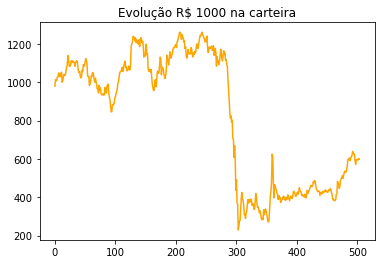

In [23]:
import matplotlib.pyplot as plt

plt.plot(1000*(1+R[1:]).cumprod(), color = 'orange')
plt.title('Evolução R$ 1000 na carteira')

* Investir R$ 1000,00 em Ibov.

Text(0.5, 1.0, 'Evolução R$ 1000 em Ibov')

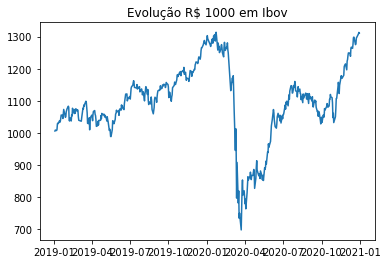

In [25]:
plt.plot(1000*(1+ibov.pct_change()).cumprod())
plt.title('Evolução R$ 1000 em Ibov')

Note que o Ibovespa conseguiu recuperar suas perdas, enquanto que nossa carteira não.
Vale notar que as regras de retorno simples e retorno logaritmo também se aplicam.

### Risco e Diversificação de um Portfólio
Você provavelmente já ouviu que deve ter um portfólio diversificado. Essa diversificação deve ser feita nos tipos de ativos investidos — não é aconselhável investir em apenas um tipo de ativo (como ações) — alternando entre ações, títulos e fundos imobiliários, por exemplo. Analogamente, o portfólio de ações em si também deve ser devidamente diversificado. Mas você sabe porque é tão importante assim essa diversificação? A resposta curta seria: para minimizar o risco.

Primeiro, cabe analisarmos como é feito o cálculo da volatilidade de um portfólio. Tendo visto anteriormente que, para uma ação individual, o risco é calculado através do desvio padrão, o mais intuitivo pode ser pensar que, para calcular o do portfólio, basta calcular o desvio padrão de cada ação e multiplicar pelo seu respectivo peso. Esse até poderia ser o caso se a flutuação de cada uma das ações fossem eventos independentes entre si. Mas, dificilmente, esse será o caso, tendo em vista que, normalmente, as ações oscilam conjuntamente. Dessa forma, a volatilidade de um portfólio será dada por:

$$\begin{equation}
\sigma = \sqrt{wCw^T}
\end{equation}$$

Sendo:
* $w$: array de dimensão (1 x n) com os pesos de cada ação, sendo n o número de ações do portfólio;
* $C$: matriz de covariância (n x n) das ações do portfólio;
* $w^T$: transposição do array com os pesos de cada ação (n x 1).

A matriz de covariância ( C ) é o fator que analisa a variação conjunta de preços de cada par de ativo. Cada covariância é calculada através da seguinte fórmula:

$$\begin{equation}
cov\left(x,y\right) = \frac{\sum_{k=1}^{N}\left(x_i-x\right)\left(y_i-y\right)}{n-1}
\end{equation}$$

Sendo:
* $x_i$: o retorno da ação A no dia i;
* $x$: o retorno médio da ação A;
* $y_i$: o retorno da ação B no dia i;
* $y$: o retorno médio da ação B;
* $n$: o número de dias analisados

Aplicando essa fórmula a cada elemento da matriz de covariância C, a diagonal principal apresentará uma característica interessante: nessa, será calculada a covariância entre a ação e ela mesma, resultando, portanto, na variância da ação. Aqui, cabe lembrar que a variância corresponde ao quadrado do desvio padrão. Assim, fica nítido o porquê de ser operada a raiz quadrada da multiplicação matricial para encontrarmos a volatilidade do portfólio.

Primeiro, vamos analisar um portfólio composto por: Azul (AZUL), Latam (LTM), Gol (GOL) e American Airlines (AAL) com pesos homogeneamente distribuídos (todas com 25%) e considerando o período de dois anos (de 01/01/2019 a 31/12/2020). Não precisamos nem plotar uma matriz de correlação para perceber que esse portfólio não é nem um pouco diversificado. Todas as ações pertencem a um mesmo setor e, portanto, tendem a apresentar um padrão de flutuação altamente correlato. Vamos calcular, então, o risco deste:

In [29]:
log_ret = np.log(df/df.shift(1))

#pesos
W = [0.25, 0.25, 0.25, 0.25]

vol = np.sqrt(np.dot(np.transpose(W), np.dot(log_ret.cov()*252, W)))
print("A volatilidade é de ",vol*100,"%")

A volatilidade é de  79.29366716985574 %


Algumas observações importantes:
1. Para cálculo, consideramos o retorno logarítmico;
2. Foi multiplicado por 252 a fim de calcularmos a volatilidade anual, e não a diária, do portfólio.

O resultado era um tanto quanto esperado haja vista que todas as ações estão relacionadas ao mesmo setor. Vamos olhar essa relação mais de perto? Para isso, usaremos uma matriz de correlação, mas antes, cabe darmos uma relembrada na fórmula de correlação a partir da covariância:

$$\begin{equation}
corr = \frac{cov \left(x,y\right)}{\sigma x * \sigma y}
\end{equation}$$

Sendo:
* $cov(x,y)$: covariância entre as ações x e y;
* $σx$: desvio padrão da ação x;
* $σy$: desvio padrão da ação y.

Assim, percebemos que a correlação é meramente uma normalização da covariância a partir dos desvios padrões. Ela costuma ser uma forma mais direta de visualização, pois possui limite inferior e superior (varia entre -1 e 1), enquanto a covariância pode variar entre -∞ e +∞. Vale lembrar que, quanto mais próximo de 1 for o valor absoluto, mais forte é a correlação. Vamos dar uma olhada, então, na matriz de correlação do portfólio 1:

<AxesSubplot:>

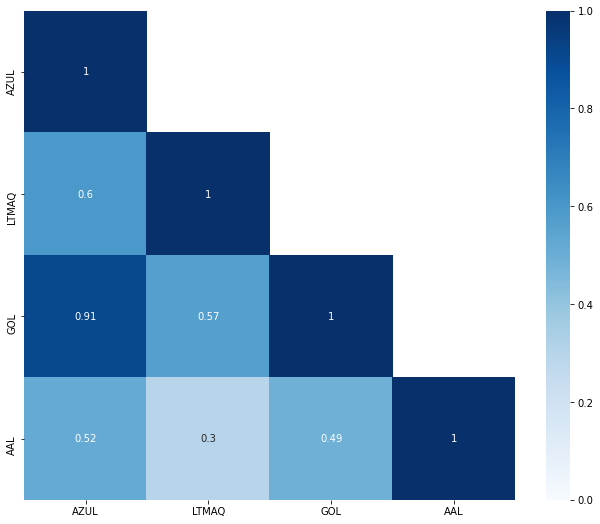

In [68]:
import seaborn as sns

corr = r.corr()

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#Gere uma máscara para o triângulo superior
mask = np.triu(corr,1)

sns.heatmap(corr, mask=mask, cmap='Blues', annot=True, vmin=0, vmax=1, center= 0.5)

Não surpreendentemente, as ações apresentam forte correlação entre si. A menos correlata é a American Airlines, o que faz sentido considerando que, das três, ela é a única que não concentra suas operações na região da América Latina.

Agora, vamos para o segundo portfólio: esse será composto pela Tesla (TSLA), Bradesco (BBD), Lockheed Martin (LMT) e pela cotação do Ouro (GC=F), com pesos distribuídos homogeneamente (25% para cada) e considerando o mesmo período do portfólio anterior. Sigamos para o cálculo do risco:

In [70]:
tickers2 = ['TSLA', 'BBD', 'LMT', 'GC=F']

df2 = pd.DataFrame()

for t in tickers2:
    df2[t] = pdr.DataReader(t, data_source='yahoo', start='01-01-2019', end = '31-12-2020')['Adj Close']

df2.tail()

,TSLA,BBD,LMT,GC=F
Date,,,,
2020-12-24,661.770020,5.232188,349.291779,NaN
2020-12-28,663.690002,5.202793,351.484955,1877.199951
2020-12-29,665.989990,5.244591,351.207092,1879.699951
2020-12-30,694.780029,5.244591,351.465118,1891.000000
2020-12-31,705.669983,5.234640,352.278870,1893.099976


In [71]:
log_ret = np.log(df2/df2.shift(1))

#pesos
W = [0.25, 0.25, 0.25, 0.25]

vol = np.sqrt(np.dot(np.transpose(W), np.dot(log_ret.cov()*252, W)))
print("A volatilidade é de ",vol*100,"%")

A volatilidade é de  30.31709792921764 %


In [74]:
# Matriz de retornos
r2 = df2.pct_change()
r2

,TSLA,BBD,LMT,GC=F
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.031472,0.012730,-0.025120,0.008431
2019-01-04,0.057697,0.013035,0.026968,-0.007045
2019-01-07,0.054361,-0.002757,0.011470,0.003196
2019-01-08,0.001164,0.016590,0.006677,-0.002798
...,...,...,...,...
2020-12-24,0.024444,0.001876,0.001052,0.000000
2020-12-28,0.002901,-0.005618,0.006279,0.001334
2020-12-29,0.003465,0.008034,-0.000791,0.001332


Bem melhor, não? Vamos dar uma olhada agora na matriz de correlação desse portfólio:

<AxesSubplot:>

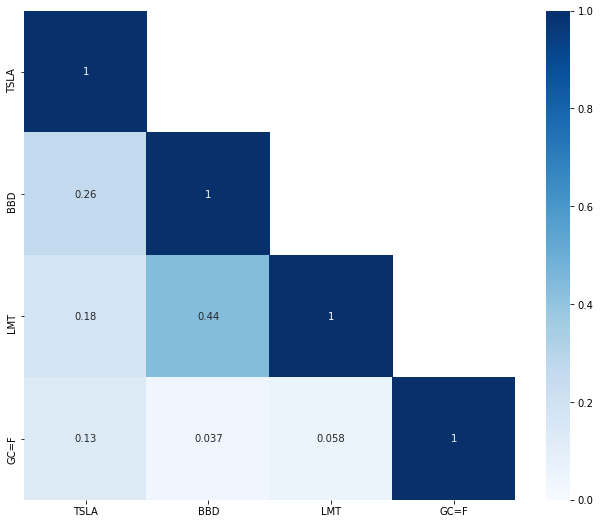

In [75]:
corr2 = r2.corr()

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#Gere uma máscara para o triângulo superior
mask = np.triu(corr,1)

sns.heatmap(corr2, mask=mask, cmap='Blues', annot=True, vmin=0, vmax=1, center= 0.5)

Nesse portfólio, as ações apresentam uma correlação bem menor entre si. O par mais correlato deste apresenta o mesmo valor de correlação (0,44). Assim, fica evidente como este está bem mais diversificado. Nessa análise, vemos também que a ação menos correlata é a da cotação do ouro. Aqui, cabe uma observação interessante: o ouro é comumente usado pelos investidores como um hedge (ou seja, uma estratégia de proteção para os riscos) contra a inflação e demais instabilidades do mercado. Geralmente, o ouro costuma apresentar um comportamento inverso ao dólar: quando esse cai, o ouro tende a ser mais demandado e, portanto, mais valorizado. Assim, se tudo mais no mercado estiver dando errado, pelo menos, parte do seu patrimônio estaria a salvo com o investimento no ouro.